In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggle/CommonLit - Evaluate Student Summaries"
%ls

/content/drive/MyDrive/Colab Notebooks/Kaggle/CommonLit - Evaluate Student Summaries
'CommonLit - Evaluate Student Summaries'   prompts_train.csv       summaries_train.csv
 Notes.gdoc                                sample_submission.csv   summaries_train.csv.zip
 prompts_test.csv                          summaries_test.csv      temp.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
import seaborn as sns

# 1. Reading the Training Data

In [ ]:
df_summaries = pd.read_csv("summaries_train.csv")
df_prompt = pd.read_csv("prompts_train.csv")
df_prompt

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [ ]:
df_summaries

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


In [ ]:
# Join the 2 dataframe
df = pd.merge(df_prompt, df_summaries, on='prompt_id', how='inner')
df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886
...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538


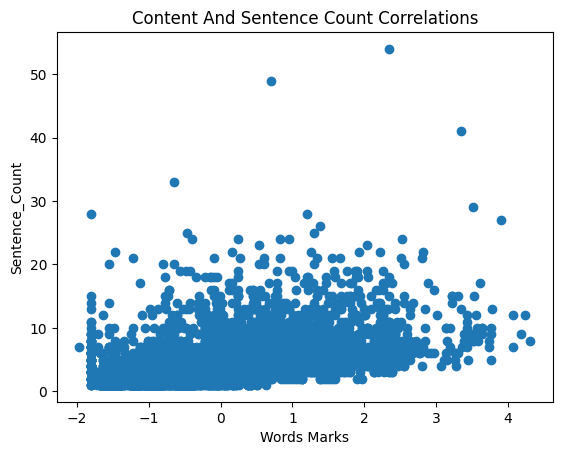

In [ ]:
# Sample data
x = df_summaries['wording']  #
y = df_summaries['Sentence_Count']

# Create scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('Words Marks')
plt.ylabel('Sentence_Count')
plt.title('Content And Sentence Count Correlations')

# Display the plot
plt.show()

# 2. Features Extraction

# 2.1 Students' Summary

# 2.1.1 Number of Words and Sentence in Student

In [ ]:
def no_of_words(text):
  # Remove \r and \n
  clean_text = re.findall(r"[a-zA-Z0-9']+", text)
  return len(clean_text)
df['Stdt_Word_Count'] = df['text'].apply(no_of_words)
df


,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,56
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,25
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,54
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,58
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,60
...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,196
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,38
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,98
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,66


In [ ]:
def no_of_sentences(text):
    # Define sentence-ending punctuation marks
    sentence_enders = ['.', '!', '?']

    # Split the text based on sentence-ending punctuation marks
    sentences = re.split(r'[' + re.escape(''.join(sentence_enders)) + ']+', text)

    # Remove empty strings from the list
    sentences = list(filter(None, sentences))

    # Count the number of sentences
    num_sentences = len(sentences)

    return num_sentences

df['Stdt_Sentence_Count'] = df['text'].apply(no_of_sentences)
df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,56,3
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,25,3
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,54,3
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,58,3
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,60,1
...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,196,9
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,38,1
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,98,6
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,66,2


# 2.1.2 Students' Word Sentence Ratio

In [ ]:
df['Stdt_w/s_ratio'] = df["Stdt_Word_Count"]/df["Stdt_Sentence_Count"]
df


,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count,Stdt_w/s_ratio
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,56,3,18.666667
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,25,3,8.333333
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,54,3,18.000000
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,58,3,19.333333
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,60,1,60.000000
...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,196,9,21.777778
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,38,1,38.000000
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,98,6,16.333333
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,66,2,33.000000


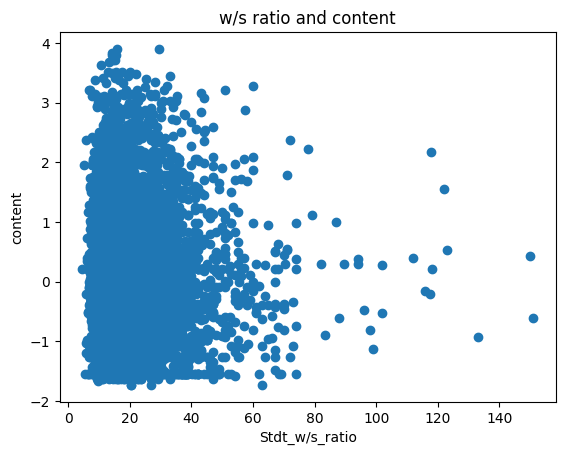

In [ ]:
# Sample data
x = df['Stdt_w/s_ratio']  #
y = df_summaries['content']

# Create scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('Stdt_w/s_ratio')
plt.ylabel('content')
plt.title('w/s ratio and content')

# Display the plot
plt.show()

# 2.2.1 Count Words and Sentences in Questions

In [ ]:
df['Q_Word_Count'] = df['prompt_question'].apply(no_of_words)
df['Q_Sentence_Count'] = df['prompt_question'].apply(no_of_sentences)
df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Vocab_Richness_Yule_K,Sentiment,Subjectivity,Stdt_Word_Count,Stdt_Sentence_Count,Stdt_w/s_ratio,Q_Word_Count,Q_Sentence_Count
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,206.837116,0.233333,0.551515,56,3,18.666667,13,1
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,44.444444,0.100000,0.833333,25,3,8.333333,13,1
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,149.744339,0.071429,0.516931,54,3,18.000000,13,1
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,150.497178,0.166667,0.494868,58,3,19.333333,13,1
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,151.171580,0.036364,0.572727,60,1,60.000000,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,147.933884,-0.125379,0.209253,196,9,21.777778,18,2
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,147.392290,0.250000,0.333333,38,1,38.000000,18,2
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,147.146254,-0.045000,0.685000,98,6,16.333333,18,2
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,183.518006,0.279167,0.400000,66,2,33.000000,18,2


# 2.2.2 Ans Words Count and Questions Words/Sentence Ratio

In [ ]:
df['A/Q_Words_Ratio'] = df['Stdt_Word_Count']/df['Q_Word_Count']
df['A/Q_Words_Sentence_Ratio'] = df['Stdt_Word_Count']/df['Q_Sentence_Count']
df

KeyError: ignored

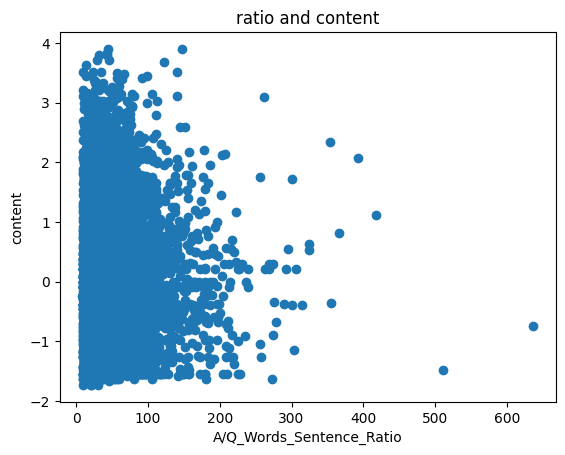

In [ ]:
# Sample data
x = df['A/Q_Words_Sentence_Ratio']  #
y = df_summaries['content']

# Create scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('A/Q_Words_Sentence_Ratio')
plt.ylabel('content')
plt.title('ratio and content')

# Display the plot
plt.show()

# 2.3 Comma and Footstop Count in Answers

In [ ]:
# Function to count the number of commas in a given text
def count_commas(text):
    return text.count(',')

# Function to count the number of full stops (periods) in a given text
def count_full_stops(text):
    return text.count('.')

# Apply the count functions on the 'text' column and create new columns for counts
df['comma_count'] = df['text'].apply(count_commas)
df['full_stop_count'] = df['text'].apply(count_full_stops)
df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count,comma_count,full_stop_count
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,56,3,0,3
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,25,3,2,2
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,54,3,3,4
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,58,3,0,3
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,60,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,196,9,9,14
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,38,1,1,1
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,98,6,6,9
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,66,2,6,2


# 3. Question And Answer Relevance

# 3.1 Cosine Similarity between Q and A

In [ ]:
!pip install spacy

In [ ]:
# Download and import modules and libraries

import spacy
!python -m spacy download en_core_web_lg

2023-10-03 11:56:02.873820: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Playing with the libraries

nlp = spacy.load("en_core_web_lg")
s1 = nlp("Animals in a jungle")
s2 = nlp("the dog and mother died because of cancer few years ago")
print(s2.similarity(s1))



0.51260236832785


# 3.1.1 Whole Sentence Score

In [ ]:
nlp = spacy.load("en_core_web_lg")

def QS_Similar_Score(question, answer):
  s1 = nlp(question)
  s2 = nlp(answer)
  return s1.similarity(s2)

'''

df['Q/S Text Similarity'] = df.apply(lambda row: QS_Similar_Score(row['prompt_question'], row['text']), axis=1)
df

'''

"\n\ndf['Q/S Text Similarity'] = df.apply(lambda row: QS_Similar_Score(row['prompt_question'], row['text']), axis=1)\ndf\n\n"

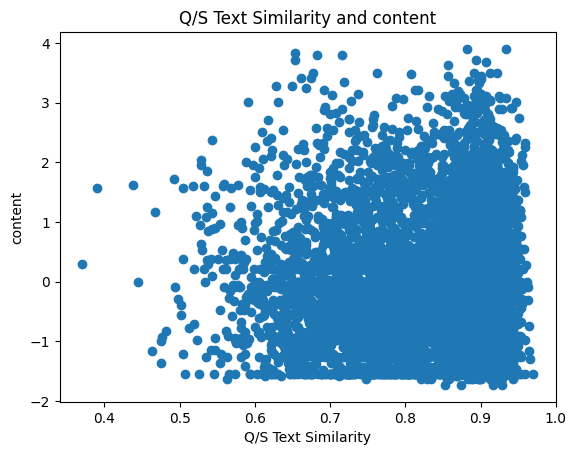

In [ ]:
# Sample data
x = df['Q/S Text Similarity']  #
y = df_summaries['content']

# Create scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('Q/S Text Similarity')
plt.ylabel('content')
plt.title('Q/S Text Similarity and content')

# Display the plot
plt.show()

# 3.1.2 Nouns, Verbs And Adjectives

In [ ]:
def extract_words(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    verbs = [token.text for token in doc if token.pos_ == 'VERB']
    return nouns, adjectives, verbs

def calculate_similarity(words1, words2):
    if len(words1) == 0 or len(words2) == 0:
        return 0.0
    else:
        s1 = nlp(' '.join(words1))
        s2 = nlp(' '.join(words2))
        return s1.similarity(s2)

def QA_Similar_Score(question, answer):
    question_nouns, question_adjectives, question_verbs = extract_words(question)
    answer_nouns, answer_adjectives, answer_verbs = extract_words(answer)
    noun_similarity = calculate_similarity(question_nouns, answer_nouns)
    adjective_similarity = calculate_similarity(question_adjectives, answer_adjectives)
    verb_similarity = calculate_similarity(question_verbs, answer_verbs)
    return noun_similarity, adjective_similarity, verb_similarity

'''
df['Noun Similarity'], df['Adjective Similarity'], df['Verb Similarity'] = zip(*df.apply(lambda row: QA_Similar_Score(row['prompt_question'], row['text']), axis=1))

# Print the updated DataFrame
print(df)

'''

"\ndf['Noun Similarity'], df['Adjective Similarity'], df['Verb Similarity'] = zip(*df.apply(lambda row: QA_Similar_Score(row['prompt_question'], row['text']), axis=1))\n\n# Print the updated DataFrame\nprint(df)\n\n"

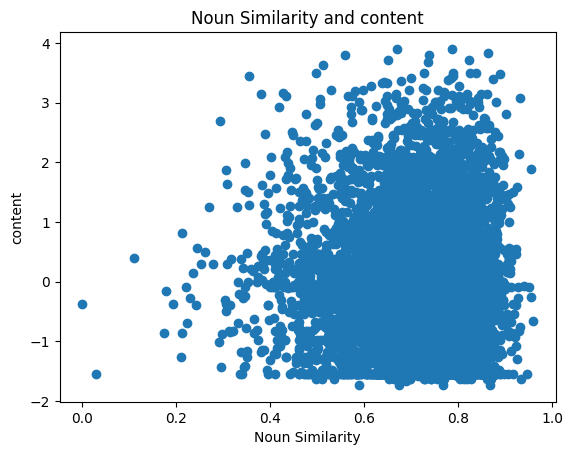

In [ ]:
x = df['Noun Similarity']  #
y = df_summaries['content']

# Create scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('Noun Similarity')
plt.ylabel('content')
plt.title('Noun Similarity and content')

# Display the plot
plt.show()

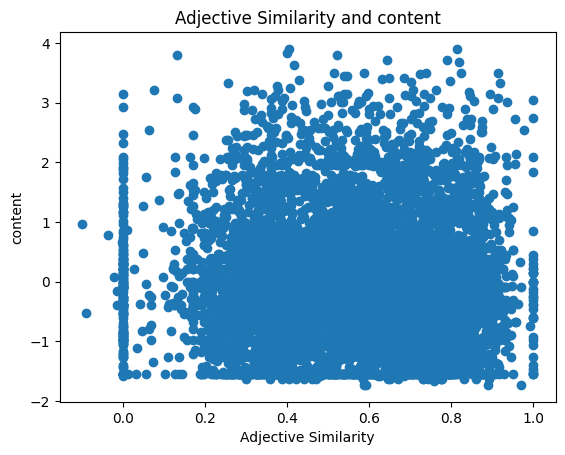

In [ ]:
x = df['Adjective Similarity']  #
y = df_summaries['content']

# Create scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('Adjective Similarity')
plt.ylabel('content')
plt.title('Adjective Similarity and content')

# Display the plot
plt.show()

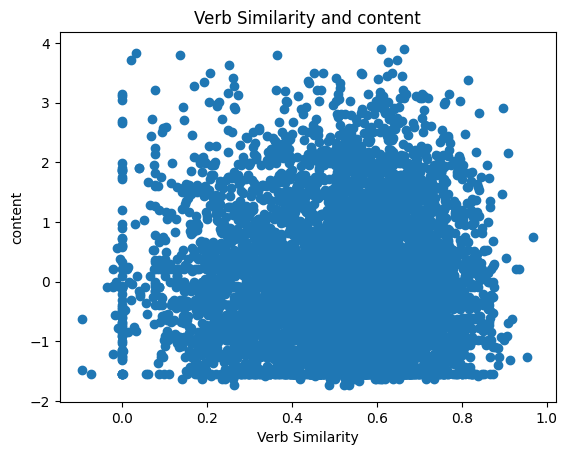

In [ ]:
x = df['Verb Similarity']  #
y = df_summaries['content']

# Create scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('Verb Similarity')
plt.ylabel('content')
plt.title('Verb Similarity and content')

# Display the plot
plt.show()

# 4. Answer Vocubaries Richness

In [ ]:
nltk.download('punkt')

texts = df['text'].tolist()

# Tokenize the texts into individual words
tokenized_texts = [nltk.word_tokenize(text.lower()) for text in texts]

  # Calculate the frequency distribution of words
word_frequencies = [FreqDist(tokens) for tokens in tokenized_texts]

  # Calculate Yule's K for each text
yule_ks = []
for freq_dist in word_frequencies:
  word_count = sum(freq_dist.values())
  m1 = float(len(freq_dist))
  m2 = sum([(freq ** 2) for freq in freq_dist.values()])
  k = 10000 * (m2 - word_count) / (word_count ** 2)
  yule_ks.append(k)


# Add Yule's K values to the DataFrame
df['Vocab_Richness_Yule_K'] = yule_ks
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Vocab_Richness_Yule_K
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,206.837116
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,44.444444
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,149.744339
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,150.497178
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,151.171580
...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,147.933884
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,147.392290
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,147.146254
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,183.518006


# 5. Readibility Score On Answers

In [ ]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.8 MB/s eta 0:00:00


In [ ]:
import textstat

def calculate_readability_score(text):
  return textstat.flesch_kincaid_grade(text)

df["Readability Score"] = df["text"].apply(calculate_readability_score)
df


,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count,comma_count,full_stop_count,Readability Score
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,56,3,0,3,8.2
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,25,3,2,2,7.0
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,54,3,3,4,11.1
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,58,3,0,3,9.6
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,60,1,0,1,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,196,9,9,14,9.5
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,38,1,1,1,12.2
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,98,6,6,9,6.2
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,66,2,6,2,12.6


# 6. Sentiment and Subjectivity

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def calculate_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

# Apply the sentiment analysis function to the "Text" column
df["Sentiment"] = df["text"].apply(calculate_sentiment)
df["Subjectivity"] = df["text"].apply(calculate_subjectivity)

# Print the DataFrame with the added sentiment analysis feature
df

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count,comma_count,full_stop_count,Readability Score,Sentiment,Subjectivity
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,56,3,0,3,8.2,0.233333,0.551515
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,25,3,2,2,7.0,0.100000,0.833333
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,54,3,3,4,11.1,0.071429,0.516931
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,58,3,0,3,9.6,0.166667,0.494868
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,60,1,0,1,24.3,0.036364,0.572727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,196,9,9,14,9.5,-0.125379,0.209253
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,38,1,1,1,12.2,0.250000,0.333333
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,98,6,6,9,6.2,-0.045000,0.685000
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,66,2,6,2,12.6,0.279167,0.400000


# 7. Matching Name Entities

In [ ]:
import spacy
!python -m spacy download en_core_web_lg

2023-09-30 14:42:40.486716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Load the spaCy English model
# nlp = spacy.load("en_core_web_lg")

# Function to perform NER matching
def ner_matching(passage, summary):
    passage_entities = set([ent.text.lower() for ent in nlp(passage).ents])
    summary_entities = set([ent.text.lower() for ent in nlp(summary).ents])
    matching_entities = passage_entities.intersection(summary_entities)
    return len(matching_entities) > 0
'''
# Apply the NER matching function to the "Passage" and "Summary" columns
df["NER Match"] = df.apply(lambda row: ner_matching(row["prompt_text"], row["text"]), axis=1)
df

'''

'\n# Apply the NER matching function to the "Passage" and "Summary" columns\ndf["NER Match"] = df.apply(lambda row: ner_matching(row["prompt_text"], row["text"]), axis=1)\ndf\n\n'

In [ ]:
df = pd.read_csv('temp.csv')
df.columns

Index(['prompt_id', 'prompt_question', 'prompt_title', 'prompt_text',
       'student_id', 'text', 'content', 'wording', 'Stdt_Word_Count',
       'Stdt_Sentence_Count', 'Stdt_w/s_ratio', 'Q_Word_Count',
       'Q_Sentence_Count', 'A/Q_Words_Ratio', 'A/Q_Words_Sentence_Ratio',
       'Q/S Text Similarity', 'Noun Similarity', 'Adjective Similarity',
       'Verb Similarity', 'comma_count', 'full_stop_count',
       'Vocab_Richness_Yule_K', 'Readability Score', 'Sentiment',
       'Subjectivity', 'NER Match'],
      dtype='object')

# 8. Count "I" and "i"

In [ ]:
def count_I(text):
  texts = text.split()
  count_i = texts.count('i')
  count_I = texts.count('I')
  return count_I + count_i

df['Count_i'] = df['text'].apply(count_I)
df[df['Count_i'] > 1]

,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count,...,Adjective Similarity,Verb Similarity,comma_count,full_stop_count,Vocab_Richness_Yule_K,Readability Score,Sentiment,Subjectivity,NER Match,Count_i
278,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,23cf90c4b662,It should not be simple but complex. It shoul...,-0.936785,-0.408519,53,5,...,0.679710,0.117117,0,5,160.523187,3.9,0.141667,0.557672,False,2
1209,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,921fe30e8d62,One major elemnet of an ideal tradgedy is the ...,1.160912,1.165980,153,11,...,0.592324,0.292241,0,10,169.541939,5.7,0.263426,0.620370,False,2
1885,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,eb12b07ff08e,"3 elements of a ""perfect"" tradgedy are, about ...",-0.002466,-0.045439,67,2,...,0.432181,0.208092,5,2,148.062128,11.4,-0.116667,0.759722,False,2
2163,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,0f190e40eaaf,The Egyptian government was made up of all...,1.567454,0.456122,229,16,...,0.874730,0.663182,9,15,123.241836,7.6,0.099845,0.481643,True,2
2173,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,1006c9649c51,Social class are treted diferentaly. at the h...,-0.584911,0.121684,59,5,...,0.600653,0.569053,1,5,193.236715,3.2,0.050833,0.494167,False,2
2231,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,15f8937ecb6a,"After readng the article called, Egyptian s...",-0.349061,-0.671255,78,7,...,0.896939,0.673429,4,6,174.220427,8.2,0.093333,0.346667,True,2
2245,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,16cd963d11bd,The Egyptian systems of government were a pyra...,1.444168,-0.548812,213,11,...,0.776922,0.603172,7,9,176.736111,7.2,0.231603,0.525192,True,4
2250,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,171ed4c37677,Their were different social classes because if...,-0.083322,0.867874,158,9,...,0.640508,0.546635,0,7,104.153516,7.6,0.032853,0.334936,False,2
2269,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,19117f6776f9,At the top of the Egyptian social classes ...,0.773704,-0.179263,158,11,...,0.834056,0.654905,11,10,220.766965,5.9,0.178388,0.565568,True,3
2294,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,1c402a766145,We are kind of like the egyption government in...,-0.131271,0.160938,102,4,...,0.496545,0.479371,0,4,127.935359,9.7,0.443750,0.566667,False,2


# 9. Count Question Mark (Question Present) and Double Quotation ()

In [ ]:
def count_question_mark(text):
  count = text.count("?")
  return count

def count_double_quotation(text):
  count1 = text.count("\'")
  count2 = text.count("\"")
  return count1 + count2

df['count_?'] = df['text'].apply(count_question_mark)
df['count_double_quotation'] = df['text'].apply(count_double_quotation)
df



,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count,...,comma_count,full_stop_count,Vocab_Richness_Yule_K,Readability Score,Sentiment,Subjectivity,NER Match,Count_i,count_?,count_double_quotation
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,56,3,...,0,3,206.837116,8.2,0.233333,0.551515,False,0,0,0
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.970237,-0.417058,25,3,...,2,2,44.444444,7.0,0.100000,0.833333,False,0,0,1
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.387791,-0.584181,54,3,...,3,4,149.744339,11.1,0.071429,0.516931,False,0,0,11
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.088882,-0.594710,58,3,...,0,3,150.497178,9.6,0.166667,0.494868,False,0,0,0
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.687288,-0.460886,60,1,...,0,1,151.171580,24.3,0.036364,0.572727,True,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.520355,-0.292990,196,9,...,9,14,147.933884,9.5,-0.125379,0.209253,True,0,0,6
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.204574,-1.169784,38,1,...,1,1,147.392290,12.2,0.250000,0.333333,True,0,0,2
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.328739,-1.053294,98,6,...,6,9,147.146254,6.2,-0.045000,0.685000,True,0,0,6
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.205683,0.380538,66,2,...,6,2,183.518006,12.6,0.279167,0.400000,False,0,0,2


# 10. Jaccard Similarity Among Passage and Answer

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of stopwords for English language
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    filtered_text = ' '.join(filtered_tokens)  # Join the filtered tokens back into a single text
    return filtered_text

def substitute_punctuation_with_space(text):
    translator = str.maketrans(string.punctuation + '\r\n', ' ' * (len(string.punctuation)+2))
    modified_text = text.translate(translator)
    modified_text = ' '.join(modified_text.split())  # Remove extra spaces between words
    return modified_text

def answer_passage_similarity(passage, answer):
  cleaned_passage = set(remove_stopwords(substitute_punctuation_with_space(passage)).split())
  cleaned_answer = set(remove_stopwords(substitute_punctuation_with_space(answer)).split())
  union_words = cleaned_passage.union(cleaned_answer)
  intersect_words = cleaned_passage.intersection(cleaned_answer)
  similarity = float(len(intersect_words))/float(len(union_words))
  return similarity
b = answer_passage_similarity("This is an example sentence with stopwords that we want to remove.", "This is an apple!")

df['answer_passage_similarity'] = df.apply(lambda x: answer_passage_similarity(x['prompt_text'], x['text']), axis=1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# 11. Features Normalization

In [ ]:
def normalization(features, mean, std):
  normalized_features = (features-mean)/std
  return normalized_features

for i in df.iloc[:, 6:].columns:
  mean = df[i].mean()
  std = df[i].std()
  df[i] = df.apply(lambda x: normalization(x[i], mean, std), axis=1)
df


,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,Stdt_Word_Count,Stdt_Sentence_Count,...,full_stop_count,Vocab_Richness_Yule_K,Readability Score,Sentiment,Subjectivity,NER Match,Count_i,count_?,count_double_quotation,answer_passage_similarity
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.187588,-0.394135,-0.356382,-0.390613,...,-0.276647,0.352551,-0.201720,0.795858,0.629867,-0.954222,-0.162591,-0.041802,-0.609625,-0.136562
1,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0086ef22de8f,The three elements of an ideal tragedy are: H...,-0.915496,-0.341670,-0.932344,-0.390613,...,-0.538079,-1.738783,-0.466384,0.102206,2.184926,-0.954222,-0.162591,-0.041802,-0.198561,-0.889047
2,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,0094589c7a22,Aristotle states that an ideal tragedy should ...,-0.357368,-0.502978,-0.393541,-0.390613,...,-0.015215,-0.382704,0.437883,-0.046434,0.439035,-0.954222,-0.162591,-0.041802,3.912077,0.394083
3,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00cd5736026a,One element of an Ideal tragedy is having a co...,0.099404,-0.513141,-0.319224,-0.390613,...,-0.276647,-0.373009,0.107054,0.449032,0.317290,-0.954222,-0.162591,-0.041802,-0.609625,-0.272427
4,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00d98b8ff756,The 3 ideal of tragedy is how complex you need...,-0.644360,-0.383973,-0.282065,-0.983316,...,-0.799510,-0.364324,3.349180,-0.228855,0.746915,1.047828,-0.162591,-0.041802,0.212502,-0.470050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff37545b2805,"In paragraph two, they would use pickle meat a...",1.471113,-0.221919,2.244735,1.387495,...,2.599102,-0.406020,0.084998,-1.070302,-1.258716,1.047828,-0.162591,-0.041802,1.856758,1.891198
7161,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff4ed38ef099,"in the first paragraph it says ""either can it...",-1.140050,-1.068205,-0.690812,-0.983316,...,-0.799510,-0.412995,0.680491,0.882565,-0.574049,1.047828,-0.162591,-0.041802,0.212502,-0.738251
7162,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff53b94f7ce0,They would have piles of filthy meat on the fl...,0.329246,-0.955769,0.423953,0.498441,...,1.291944,-0.416163,-0.642826,-0.652140,1.366430,1.047828,-0.162591,-0.041802,1.856758,0.553909
7163,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",ff7c7e70df07,They used all sorts of chemical concoctions to...,0.211328,0.428175,-0.170588,-0.686964,...,-0.538079,0.052242,0.768712,1.034301,-0.206185,-0.954222,-0.162591,-0.041802,0.212502,-0.194060


In [ ]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/CommonLit - Evaluate Student Summaries/temp.csv', index=False)

# 12. Build the Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
y_content = df['content']
y_wording = df['wording']
X = df.iloc[:, 8:]

model = XGBRegressor()
model.fit(X, y_wording)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# 13. Feature Extraction For Test Data

In [ ]:
def feature_extraction(prompts, summaries):
  test_df = pd.merge(prompts, summaries, on='prompt_id', how='inner')
  test_df['Stdt_Word_Count'] = test_df['text'].apply(no_of_words)
  test_df['Stdt_Sentence_Count'] = test_df['text'].apply(no_of_sentences)
  test_df['Stdt_w/s_ratio'] = test_df["Stdt_Word_Count"]/test_df["Stdt_Sentence_Count"]
  test_df['Q_Word_Count'] = test_df['prompt_question'].apply(no_of_words)
  test_df['Q_Sentence_Count'] = test_df['prompt_question'].apply(no_of_sentences)
  test_df['A/Q_Words_Ratio'] = test_df['Stdt_Word_Count']/test_df['Q_Word_Count']
  test_df['A/Q_Words_Sentence_Ratio'] = test_df['Stdt_Word_Count']/test_df['Q_Sentence_Count'] # 2.2.2
  test_df['comma_count'] = test_df['text'].apply(count_commas)
  test_df['full_stop_count'] = test_df['text'].apply(count_full_stops)
  test_df['Q/S Text Similarity'] = test_df.apply(lambda row: QS_Similar_Score(row['prompt_question'], row['text']), axis=1)
  test_df['Noun Similarity'], test_df['Adjective Similarity'], test_df['Verb Similarity'] = zip(*test_df.apply(lambda row: QA_Similar_Score(row['prompt_question'], row['text']), axis=1))
  nltk.download('punkt')

  texts = test_df['text'].tolist()

  # Tokenize the texts into individual words
  tokenized_texts = [nltk.word_tokenize(text.lower()) for text in texts]

    # Calculate the frequency distribution of words
  word_frequencies = [FreqDist(tokens) for tokens in tokenized_texts]

    # Calculate Yule's K for each text
  yule_ks = []
  for freq_dist in word_frequencies:
    word_count = sum(freq_dist.values())
    m1 = float(len(freq_dist))
    m2 = sum([(freq ** 2) for freq in freq_dist.values()])
    k = 10000 * (m2 - word_count) / (word_count ** 2)
    yule_ks.append(k)


  # Add Yule's K values to the DataFrame
  test_df['Vocab_Richness_Yule_K'] = yule_ks
  test_df["Readability Score"] = test_df["text"].apply(calculate_readability_score)
  test_df["Sentiment"] = test_df["text"].apply(calculate_sentiment)
  test_df["Subjectivity"] = test_df["text"].apply(calculate_subjectivity)
  test_df["NER Match"] = test_df.apply(lambda row: ner_matching(row["prompt_text"], row["text"]), axis=1)
  test_df['Count_i'] = test_df['text'].apply(count_I)
  test_df['count_?'] = test_df['text'].apply(count_question_mark)
  test_df['count_double_quotation'] = test_df['text'].apply(count_double_quotation)
  test_df['answer_passage_similarity'] = test_df.apply(lambda x: answer_passage_similarity(x['prompt_text'], x['text']), axis=1)

  return test_df.iloc[:, 6:]



In [ ]:
test_prompts = pd.read_csv('prompts_test.csv')
test_prompts

,prompt_id,prompt_question,prompt_title,prompt_text
0,abc123,Summarize...,Example Title 1,Heading\nText...
1,def789,Summarize...,Example Title 2,Heading\nText...


In [ ]:
test_summaries = pd.read_csv('summaries_test.csv')
test_summaries

,student_id,prompt_id,text
0,000000ffffff,abc123,Example text 1
1,111111eeeeee,def789,Example text 2
2,222222cccccc,abc123,Example text 3
3,333333dddddd,def789,Example text 4


In [ ]:
test = feature_extraction(test_prompts, test_summaries)
test

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Stdt_Word_Count,Stdt_Sentence_Count,Stdt_w/s_ratio,Q_Word_Count,Q_Sentence_Count,A/Q_Words_Ratio,A/Q_Words_Sentence_Ratio,comma_count,full_stop_count,Q/S Text Similarity,...,Verb Similarity,Vocab_Richness_Yule_K,Readability Score,Sentiment,Subjectivity,NER Match,Count_i,count_?,count_double_quotation,answer_passage_similarity
0,3,1,3.0,1,1,3.0,3.0,0,0,0.207851,...,0.0,0.0,5.6,0.0,0.0,False,0,0,0,0.0
1,3,1,3.0,1,1,3.0,3.0,0,0,0.218022,...,0.0,0.0,5.6,0.0,0.0,False,0,0,0,0.0
2,3,1,3.0,1,1,3.0,3.0,0,0,0.232666,...,0.0,0.0,5.6,0.0,0.0,False,0,0,0,0.0
3,3,1,3.0,1,1,3.0,3.0,0,0,0.185199,...,0.0,0.0,5.6,0.0,0.0,False,0,0,0,0.0


In [ ]:
for i in test.columns:
  mean = test[i].mean()
  std = test[i].std()
  if std == 0:
    std = 1
  test[i] = test.apply(lambda x: normalization(x[i], mean, std), axis=1)

test

,Stdt_Word_Count,Stdt_Sentence_Count,Stdt_w/s_ratio,Q_Word_Count,Q_Sentence_Count,A/Q_Words_Ratio,A/Q_Words_Sentence_Ratio,comma_count,full_stop_count,Q/S Text Similarity,...,Verb Similarity,Vocab_Richness_Yule_K,Readability Score,Sentiment,Subjectivity,NER Match,Count_i,count_?,count_double_quotation,answer_passage_similarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.154534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.089152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.289839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test

,Stdt_Word_Count,Stdt_Sentence_Count,Stdt_w/s_ratio,Q_Word_Count,Q_Sentence_Count,A/Q_Words_Ratio,A/Q_Words_Sentence_Ratio,comma_count,full_stop_count,Q/S Text Similarity,...,Verb Similarity,Vocab_Richness_Yule_K,Readability Score,Sentiment,Subjectivity,NER Match,Count_i,count_?,count_double_quotation,answer_passage_similarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.154534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.089152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.289839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 13. KFold Cross Validation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=100, shuffle=True, random_state=20)

# content
content_mse_scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y_content.iloc[train_index], y_content.iloc[test_index]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  content_mse_scores.append(mean_squared_error(y_test, y_pred))

print(np.mean(content_mse_scores))



0.20833608018828514


In [ ]:
kf = KFold(n_splits=100, shuffle=True, random_state=20)

# wording
wording_mse_scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y_wording.iloc[train_index], y_wording.iloc[test_index]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  wording_mse_scores.append(mean_squared_error(y_test, y_pred))

print(np.mean(wording_mse_scores))

0.3683460546991499
